In [54]:
import MDAnalysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
pwd

'D:\\New folder'

In [73]:
pairs=(64,79) 

In [74]:
Traj=MDAnalysis.Universe('trajectory_files/LC3B_ER_SIM1_1us_dt1000.pdb')

LC3B_SIM1_min_dist_ls=[]
LC3B_SIM1_contact_stat=[]
LC3B_SIM1_contact_count=0
LC3B_SIM1_total_frames=len(Traj.trajectory)

for t in Traj.trajectory:
    #selecting all the heavy atoms 
    sel1=Traj.select_atoms('resid %d and not type H'%pairs[0])
    sel2=Traj.select_atoms('resid %d and not type H'%pairs[1])
    dist_ls=[]
    for i in sel1.atoms:
        for j in sel2.atoms:

            pos_1=np.array(i.position)  
            pos_2=np.array(j.position)

            dist=np.linalg.norm(pos_1 - pos_2)
            dist_ls.append(dist)
    LC3B_SIM1_min_dist_ls.append(min(dist_ls))
    if min(dist_ls)<=5:
        #print('contact found at %d'%t.frame)
        LC3B_SIM1_contact_stat.append('YES')
        LC3B_SIM1_contact_count=LC3B_SIM1_contact_count+1
    else:
        LC3B_SIM1_contact_stat.append('NO')

LC3B_SIM1_contact_occup=LC3B_SIM1_contact_count/LC3B_SIM1_total_frames
print('Contact probability b/w %d and %d is %f'%(pairs[0],pairs[1],
                                                 LC3B_SIM1_contact_occup))


Contact probability b/w 64 and 79 is 0.999001


In [75]:
Traj=MDAnalysis.Universe('trajectory_files/LC3B-ER-SIM2-dt1000.pdb')

LC3B_SIM2_min_dist_ls=[]
LC3B_SIM2_contact_stat=[]
LC3B_SIM2_contact_count=0
LC3B_SIM2_total_frames=len(Traj.trajectory)

for t in Traj.trajectory:
    #selecting all the heavy atoms 
    sel1=Traj.select_atoms('resid %d and not type H'%pairs[0])
    sel2=Traj.select_atoms('resid %d and not type H'%pairs[1])
    dist_ls=[]
    for i in sel1.atoms:
        for j in sel2.atoms:

            pos_1=np.array(i.position)  
            pos_2=np.array(j.position)

            dist=np.linalg.norm(pos_1 - pos_2)
            dist_ls.append(dist)
    LC3B_SIM2_min_dist_ls.append(min(dist_ls))
    if min(dist_ls)<=5:
        #print('contact found at %d'%t.frame)
        LC3B_SIM2_contact_stat.append('YES')
        LC3B_SIM2_contact_count=LC3B_SIM2_contact_count+1
    else:
        LC3B_SIM2_contact_stat.append('NO')

LC3B_SIM2_contact_occup=LC3B_SIM2_contact_count/LC3B_SIM2_total_frames
print('Contact probability b/w %d and %d is %f'%(pairs[0],pairs[1],
                                                 LC3B_SIM2_contact_occup))


Contact probability b/w 64 and 79 is 0.999001


In [76]:
Traj=MDAnalysis.Universe('trajectory_files/LC3B-ER-SIM3-dt1000.pdb')

LC3B_SIM3_min_dist_ls=[]
LC3B_SIM3_contact_stat=[]
LC3B_SIM3_contact_count=0
LC3B_SIM3_total_frames=len(Traj.trajectory)

for t in Traj.trajectory:
    #selecting all the heavy atoms 
    sel1=Traj.select_atoms('resid %d and not type H'%pairs[0])
    sel2=Traj.select_atoms('resid %d and not type H'%pairs[1])
    dist_ls=[]
    for i in sel1.atoms:
        for j in sel2.atoms:

            pos_1=np.array(i.position)  
            pos_2=np.array(j.position)

            dist=np.linalg.norm(pos_1 - pos_2)
            dist_ls.append(dist)
    LC3B_SIM3_min_dist_ls.append(min(dist_ls))
    if min(dist_ls)<=5:
        #print('contact found at %d'%t.frame)
        LC3B_SIM3_contact_stat.append('YES')
        LC3B_SIM3_contact_count=LC3B_SIM3_contact_count+1
    else:
        LC3B_SIM3_contact_stat.append('NO')

LC3B_SIM3_contact_occup=LC3B_SIM3_contact_count/LC3B_SIM3_total_frames
print('Contact probability b/w %d and %d is %f'%(pairs[0],pairs[1],
                                                 LC3B_SIM3_contact_occup))


Contact probability b/w 64 and 79 is 0.998002


In [77]:
LC3B_SIM1_contact_stat_df=pd.DataFrame() 
LC3B_SIM1_contact_stat_df['Minimum Distance']=LC3B_SIM1_min_dist_ls
LC3B_SIM1_contact_stat_df['Contact?']=LC3B_SIM1_contact_stat

In [78]:
LC3B_SIM2_contact_stat_df=pd.DataFrame() 
LC3B_SIM2_contact_stat_df['Minimum Distance']=LC3B_SIM2_min_dist_ls
LC3B_SIM2_contact_stat_df['Contact?']=LC3B_SIM2_contact_stat

In [79]:
LC3B_SIM3_contact_stat_df=pd.DataFrame() 
LC3B_SIM3_contact_stat_df['Minimum Distance']=LC3B_SIM3_min_dist_ls
LC3B_SIM3_contact_stat_df['Contact?']=LC3B_SIM3_contact_stat

In [80]:
LC3B_SIM3_contact_stat_df

,Minimum Distance,Contact?
0,3.822812,YES
1,3.919249,YES
2,4.032174,YES
3,4.014836,YES
4,3.730444,YES
...,...,...
996,3.996836,YES
997,3.973030,YES
998,3.646600,YES
999,3.636894,YES


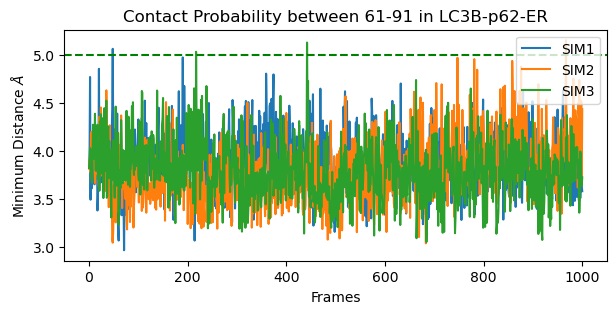

In [81]:
plt.figure(figsize=(7,3))
plt.plot(LC3B_SIM1_min_dist_ls, label='SIM1')
plt.plot(LC3B_SIM2_min_dist_ls, label='SIM2')
plt.plot(LC3B_SIM3_min_dist_ls, label='SIM3')
plt.axhline(y=5,ls='--',color='green')
plt.xlabel('Frames')
plt.ylabel('Minimum Distance $\AA$')
#plt.title('Contact probability: $\\frac{%d}{%d}=%f$'%(contact_count,total_frames,contact_occup))
plt.title('Contact Probability between 61-91 in LC3B-p62-ER')
plt.legend(loc='upper right', prop={'size': 10})

In [82]:
Traj=MDAnalysis.Universe('trajectory_files/LC3B-p62-ER-SIM1_dt1000.pdb')

LC3B_p62_SIM1_min_dist_ls=[]
LC3B_p62_SIM1_contact_stat=[]
LC3B_p62_SIM1_contact_count=0
LC3B_p62_SIM1_total_frames=len(Traj.trajectory)

for t in Traj.trajectory:
    #selecting all the heavy atoms 
    sel1=Traj.select_atoms('resid %d and not type H'%pairs[0])
    sel2=Traj.select_atoms('resid %d and not type H'%pairs[1])
    dist_ls=[]
    for i in sel1.atoms:
        for j in sel2.atoms:

            pos_1=np.array(i.position)  
            pos_2=np.array(j.position)

            dist=np.linalg.norm(pos_1 - pos_2)
            dist_ls.append(dist)
    LC3B_p62_SIM1_min_dist_ls.append(min(dist_ls))
    if min(dist_ls)<=5:
        #print('contact found at %d'%t.frame)
        LC3B_p62_SIM1_contact_stat.append('YES')
        LC3B_p62_SIM1_contact_count=LC3B_p62_SIM1_contact_count+1
    else:
        LC3B_p62_SIM1_contact_stat.append('NO')

LC3B_p62_SIM1_contact_occup=LC3B_p62_SIM1_contact_count/LC3B_p62_SIM1_total_frames
print('Contact probability b/w %d and %d is %f'%(pairs[0],pairs[1],
                                                 LC3B_p62_SIM1_contact_occup))


Contact probability b/w 64 and 79 is 0.999001


In [83]:
Traj=MDAnalysis.Universe('trajectory_files/LC3B-p62-ER-SIM2_dt1000.pdb')

LC3B_p62_SIM2_min_dist_ls=[]
LC3B_p62_SIM2_contact_stat=[]
LC3B_p62_SIM2_contact_count=0
LC3B_p62_SIM2_total_frames=len(Traj.trajectory)

for t in Traj.trajectory:
    #selecting all the heavy atoms 
    sel1=Traj.select_atoms('resid %d and not type H'%pairs[0])
    sel2=Traj.select_atoms('resid %d and not type H'%pairs[1])
    dist_ls=[]
    for i in sel1.atoms:
        for j in sel2.atoms:

            pos_1=np.array(i.position)  
            pos_2=np.array(j.position)

            dist=np.linalg.norm(pos_1 - pos_2)
            dist_ls.append(dist)
    LC3B_p62_SIM2_min_dist_ls.append(min(dist_ls))
    if min(dist_ls)<=5:
        #print('contact found at %d'%t.frame)
        LC3B_p62_SIM2_contact_stat.append('YES')
        LC3B_p62_SIM2_contact_count=LC3B_p62_SIM2_contact_count+1
    else:
        LC3B_p62_SIM2_contact_stat.append('NO')

LC3B_p62_SIM2_contact_occup=LC3B_p62_SIM2_contact_count/LC3B_p62_SIM2_total_frames
print('Contact probability b/w %d and %d is %f'%(pairs[0],pairs[1],
                                                 LC3B_p62_SIM2_contact_occup))


Contact probability b/w 64 and 79 is 1.000000


In [84]:
Traj=MDAnalysis.Universe('trajectory_files/LC3B-p62-ER-SIM3-dt1000.pdb')

LC3B_p62_SIM3_min_dist_ls=[]
LC3B_p62_SIM3_contact_stat=[]
LC3B_p62_SIM3_contact_count=0
LC3B_p62_SIM3_total_frames=len(Traj.trajectory)

for t in Traj.trajectory:
    #selecting all the heavy atoms 
    sel1=Traj.select_atoms('resid %d and not type H'%pairs[0])
    sel2=Traj.select_atoms('resid %d and not type H'%pairs[1])
    dist_ls=[]
    for i in sel1.atoms:
        for j in sel2.atoms:

            pos_1=np.array(i.position)  
            pos_2=np.array(j.position)

            dist=np.linalg.norm(pos_1 - pos_2)
            dist_ls.append(dist)
    LC3B_p62_SIM3_min_dist_ls.append(min(dist_ls))
    if min(dist_ls)<=5:
        #print('contact found at %d'%t.frame)
        LC3B_p62_SIM3_contact_stat.append('YES')
        LC3B_p62_SIM3_contact_count=LC3B_p62_SIM3_contact_count+1
    else:
        LC3B_p62_SIM3_contact_stat.append('NO')

LC3B_p62_SIM3_contact_occup=LC3B_p62_SIM3_contact_count/LC3B_p62_SIM3_total_frames
print('Contact probability b/w %d and %d is %f'%(pairs[0],pairs[1],
                                                 LC3B_p62_SIM3_contact_occup))


Contact probability b/w 64 and 79 is 0.998002


In [85]:
LC3B_p62_SIM1_contact_stat_df=pd.DataFrame() 
LC3B_p62_SIM1_contact_stat_df['Minimum Distance']=LC3B_p62_SIM1_min_dist_ls
LC3B_p62_SIM1_contact_stat_df['Contact?']=LC3B_p62_SIM1_contact_stat

In [86]:
LC3B_p62_SIM2_contact_stat_df=pd.DataFrame() 
LC3B_p62_SIM2_contact_stat_df['Minimum Distance']=LC3B_p62_SIM2_min_dist_ls
LC3B_p62_SIM2_contact_stat_df['Contact?']=LC3B_p62_SIM2_contact_stat

In [87]:
LC3B_p62_SIM3_contact_stat_df=pd.DataFrame() 
LC3B_p62_SIM3_contact_stat_df['Minimum Distance']=LC3B_p62_SIM3_min_dist_ls
LC3B_p62_SIM3_contact_stat_df['Contact?']=LC3B_p62_SIM3_contact_stat

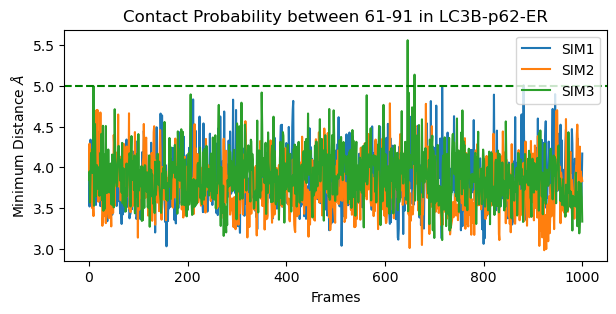

In [88]:
plt.figure(figsize=(7,3))
plt.plot(LC3B_p62_SIM1_min_dist_ls, label='SIM1')
plt.plot(LC3B_p62_SIM2_min_dist_ls, label='SIM2')
plt.plot(LC3B_p62_SIM3_min_dist_ls, label='SIM3')
plt.axhline(y=5,ls='--',color='green')
plt.xlabel('Frames')
plt.ylabel('Minimum Distance $\AA$')
# plt.title('Contact probability: $\\frac{%d}{%d}=%f$'%(contact_count,total_frames,contact_occup))
plt.title('Contact Probability between 61-91 in LC3B-p62-ER')
plt.legend(loc='upper right', prop={'size': 10})

# POPC trajectories contact check